### EDA notebook

# Importing libraries and defining paths & other specs

In [85]:
# Importing libraries

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
import os

In [87]:
# Defining paths

# Data folder

data_folder = os.getcwd() + "/Data"

# getting contents of data folder

contents = os.listdir(data_folder)

# printing index and file
print("Printing index and file of data folder\n")
for index, file in enumerate(contents):
    print(f"{index}: {file}")

Printing index and file of data folder

0: electric-chargepoint-analysis-2017-raw-domestics-data.csv
1: 5340tab_FFBDC9C7BD8009ED0E6E89684BE8D024FC17FFE3D108ACE3959727E98A028DD9_V1.zip:Zone.Identifier
2: electric-chargepoint-analysis-2017-raw-domestics-data.csv:Zone.Identifier
3: NTS_data


### Importing dataset

In [88]:
ev_dataset_path = data_folder + "/" + contents[0]

df = pd.read_csv(ev_dataset_path)

**Getting Info**

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3176803 entries, 0 to 3176802
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ChargingEvent   float64
 1   CPID            object 
 2   StartDate       object 
 3   StartTime       object 
 4   EndDate         object 
 5   EndTime         object 
 6   Energy          float64
 7   PluginDuration  float64
dtypes: float64(3), object(5)
memory usage: 193.9+ MB


**Getting description**

In [90]:
df.describe()

,ChargingEvent,Energy,PluginDuration
count,3.176802e+06,3.176803e+06,3.176803e+06
mean,1.156975e+07,9.096553e+00,1.269560e+01
std,4.850281e+06,7.834976e+00,3.985971e+01
min,4.938540e+05,1.000000e-02,5.027778e-02
25%,1.125799e+07,4.100000e+00,2.800000e+00
50%,1.326506e+07,7.500000e+00,1.075333e+01
75%,1.506277e+07,1.110000e+01,1.515083e+01
max,1.683125e+07,9.930000e+01,5.876087e+03


In [91]:
display(df.tail())

,ChargingEvent,CPID,StartDate,StartTime,EndDate,EndTime,Energy,PluginDuration
3176798,10958081.0,AN14208,2017-01-01,00:00:59,2017-01-01,00:59:27,3.7,0.974444
3176799,10955513.0,AN13651,2017-01-01,00:00:52,2017-01-02,02:18:11,6.1,26.288611
3176800,2032525.0,AN22023,2017-01-01,00:00:34,2017-01-01,15:12:06,2.2,15.192222
3176801,2032524.0,AN24284,2017-01-01,00:00:14,2017-01-01,08:00:14,2.8,8.000000
3176802,2032523.0,AN23248,2017-01-01,00:00:03,2017-01-01,11:14:28,23.3,11.240278


In [118]:
# Creating a column that merges start date and start time

df["Start_time_ts"] = df["StartDate"] + " " + df["StartTime"]

df["Start_time_ts"] = pd.to_datetime(df["Start_time_ts"])

# Rounding up to the top half hour

df["Start_time_ts"] = df["Start_time_ts"].dt.ceil("30min")

In [140]:
df


,ChargingEvent,CPID,StartDate,StartTime,EndDate,EndTime,Energy,PluginDuration,Start_time_ts
0,3177742.0,AN21771,2017-12-31,23:59:23,2018-01-01,18:20:23,8.8,18.350000,2018-01-01 00:00:00
1,16679268.0,AN04715,2017-12-31,23:59:00,2018-01-01,00:03:00,10.2,0.066667,2018-01-01 00:00:00
2,16678965.0,AN04849,2017-12-31,23:59:00,2018-01-01,13:40:00,6.2,13.683333,2018-01-01 00:00:00
3,3177556.0,AN21305,2017-12-31,23:57:23,2018-01-01,06:30:23,9.5,6.550000,2018-01-01 00:00:00
4,16679057.0,AN08380,2017-12-31,23:57:00,2018-01-01,03:13:00,2.8,3.266667,2018-01-01 00:00:00
...,...,...,...,...,...,...,...,...,...
3176798,10958081.0,AN14208,2017-01-01,00:00:59,2017-01-01,00:59:27,3.7,0.974444,2017-01-01 00:30:00
3176799,10955513.0,AN13651,2017-01-01,00:00:52,2017-01-02,02:18:11,6.1,26.288611,2017-01-01 00:30:00
3176800,2032525.0,AN22023,2017-01-01,00:00:34,2017-01-01,15:12:06,2.2,15.192222,2017-01-01 00:30:00
3176801,2032524.0,AN24284,2017-01-01,00:00:14,2017-01-01,08:00:14,2.8,8.000000,2017-01-01 00:30:00


**Applying dt transformations to columns**

In [70]:
time_cols_to_convert = ["StartTime", "EndTime"]
date_cols_to_convert = ["StartDate", "EndDate"]

time_fmt = "%H:%M:%S"
date_fmt = "%Y-%m-%d"

# Applying to columns

df[time_cols_to_convert] = df[time_cols_to_convert].apply(lambda col: pd.to_datetime(col, format=time_fmt))
df[date_cols_to_convert] = df[date_cols_to_convert].apply(lambda col: pd.to_datetime(col, format=date_fmt))

In [71]:
df.describe()

,ChargingEvent,StartDate,StartTime,EndDate,EndTime,Energy,PluginDuration
count,3.176802e+06,3176803,3176803,3176803,3176803,3.176803e+06,3.176803e+06
mean,1.156975e+07,2017-07-15 17:02:47.875566592,1900-01-01 15:50:52.300027904,2017-07-16 09:44:34.265543424,1900-01-01 11:50:49.612032256,9.096553e+00,1.269560e+01
min,4.938540e+05,2017-01-01 00:00:00,1900-01-01 00:00:00,2017-01-01 00:00:00,1900-01-01 00:00:00,1.000000e-02,5.027778e-02
25%,1.125799e+07,2017-04-04 00:00:00,1900-01-01 12:54:01.500000,2017-04-04 00:00:00,1900-01-01 07:57:32,4.100000e+00,2.800000e+00
50%,1.326506e+07,2017-07-27 00:00:00,1900-01-01 16:59:00,2017-07-28 00:00:00,1900-01-01 10:25:00,7.500000e+00,1.075333e+01
75%,1.506277e+07,2017-10-22 00:00:00,1900-01-01 19:18:00,2017-10-23 00:00:00,1900-01-01 15:47:13,1.110000e+01,1.515083e+01
max,1.683125e+07,2017-12-31 00:00:00,1900-01-01 23:59:59,2018-02-14 00:00:00,1900-01-01 23:59:59,9.930000e+01,5.876087e+03
std,4.850281e+06,NaN,NaN,NaN,NaN,7.834976e+00,3.985971e+01


In [72]:
unique_cp_num = len(df.CPID.unique())
unique_charges_num = len(df.ChargingEvent.unique())

print(f"{unique_charges_num} charges recorded from {unique_cp_num} unique charging points")

3173236 charges recorded from 25126 unique charging points


**Creating a plot of Energy (y) by charge duration in hourly bins**

In [73]:
# Obtaining grouped data

# Obtaining hourly bins

hourly_bins = list(range(0, 49)) + [float("inf")]

# Creating PluginDuration_binned

df["PluginDuration_binned"] = pd.cut(df["PluginDuration"], bins=hourly_bins)

# groupby bins and calculate mean energy
mean_energy_per_duration_df = df.groupby("PluginDuration_binned")["Energy"].mean()

# Obtaining a df with charge durations less than 48 hours

# Checking

display(df[["PluginDuration", "PluginDuration_binned"]])
display(mean_energy_per_duration_df)



/tmp/ipykernel_10975/3511911147.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_energy_per_duration_df = df.groupby("PluginDuration_binned")["Energy"].mean()


,PluginDuration,PluginDuration_binned
0,18.350000,"(18.0, 19.0]"
1,0.066667,"(0.0, 1.0]"
2,13.683333,"(13.0, 14.0]"
3,6.550000,"(6.0, 7.0]"
4,3.266667,"(3.0, 4.0]"
...,...,...
3176798,0.974444,"(0.0, 1.0]"
3176799,26.288611,"(26.0, 27.0]"
3176800,15.192222,"(15.0, 16.0]"
3176801,8.000000,"(7.0, 8.0]"


PluginDuration_binned
(0.0, 1.0]       2.296590
(1.0, 2.0]       5.138205
(2.0, 3.0]       7.314695
(3.0, 4.0]       8.551317
(4.0, 5.0]       9.258422
(5.0, 6.0]       9.750346
(6.0, 7.0]      10.269316
(7.0, 8.0]      11.138972
(8.0, 9.0]      11.589353
(9.0, 10.0]     11.630601
(10.0, 11.0]    11.516825
(11.0, 12.0]    11.335572
(12.0, 13.0]    11.124404
(13.0, 14.0]    10.945228
(14.0, 15.0]    10.704841
(15.0, 16.0]    10.486491
(16.0, 17.0]    10.244562
(17.0, 18.0]    10.204755
(18.0, 19.0]    10.110838
(19.0, 20.0]    10.001803
(20.0, 21.0]     9.968983
(21.0, 22.0]    10.061762
(22.0, 23.0]     9.787171
(23.0, 24.0]     9.919093
(24.0, 25.0]    10.231520
(25.0, 26.0]    10.595222
(26.0, 27.0]    10.576411
(27.0, 28.0]    10.566556
(28.0, 29.0]    10.644622
(29.0, 30.0]    10.643225
(30.0, 31.0]    11.414615
(31.0, 32.0]    12.028549
(32.0, 33.0]    12.177244
(33.0, 34.0]    12.215595
(34.0, 35.0]    12.393330
(35.0, 36.0]    12.215188
(36.0, 37.0]    12.163559
(37.0, 38.0]    

<Axes: title={'center': 'Energy Utilised by Hourly Binned Plug-in Duration'}, xlabel='PluginDuration_binned', ylabel='Energy (kWh)'>

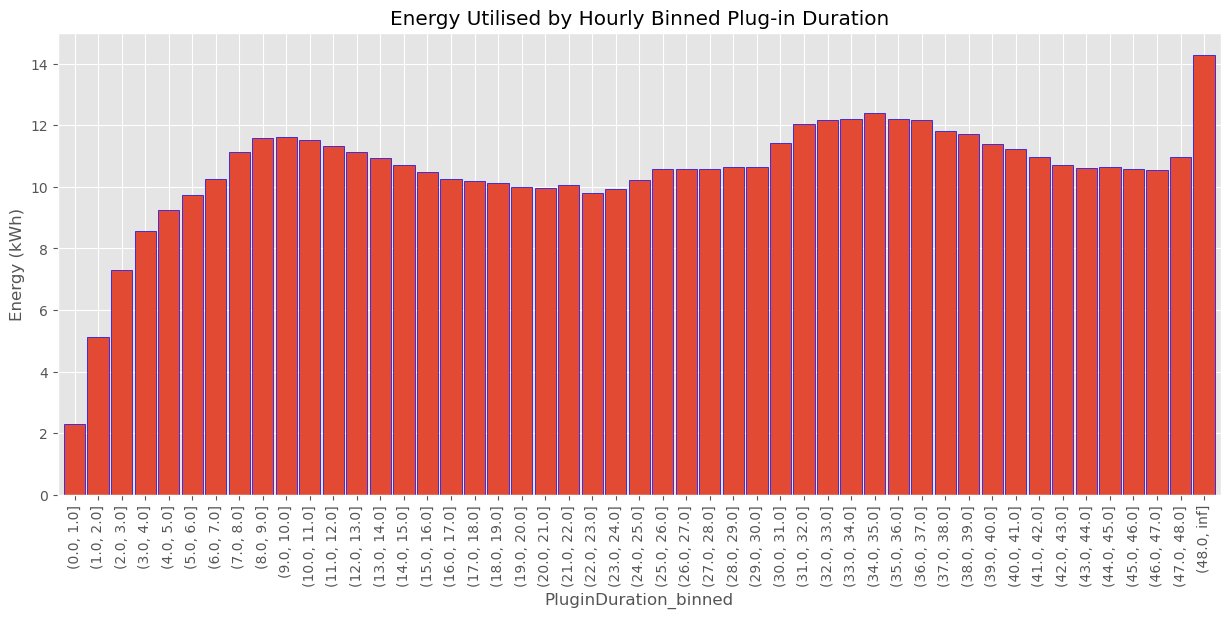

In [74]:
# Doing plot

plt.style.use('ggplot')

# Plot using matplotlib
plt.figure(figsize=(15, 6))
plt.title("Energy Utilised by Hourly Binned Plug-in Duration")
plt.ylabel("Energy (kWh)")
plt.xlabel("Plug-in duration (hourly-binned)")

mean_energy_per_duration_df.plot(kind="bar", width=0.9, edgecolor='blue')

**Obtaining Average energy consumption and Average plug in duration for users**

In [75]:
cols_to_groupby = ["Energy", "PluginDuration", "StartTime"]

cp_grouped_df = df.groupby("CPID")[cols_to_groupby].mean()

display(cp_grouped_df.head())

,Energy,PluginDuration,StartTime
CPID,,,
AN00001,14.589286,21.428224,1900-01-01 12:32:39.057143040
AN00002,23.667742,22.220260,1900-01-01 16:20:41.720430080
AN00003,4.766667,8.036204,1900-01-01 08:58:28.666666752
AN00004,10.340333,18.009308,1900-01-01 10:16:33.623333376
AN00005,15.750000,5.879028,1900-01-01 20:00:04.000000000


In [ ]:
cp_grouped_df.describe()

,Energy,PluginDuration,StartTime
count,25126.000000,25126.000000,25126
mean,10.908709,17.991983,1900-01-01 15:40:52.800057856
min,0.100000,0.050833,1900-01-01 00:00:31
25%,6.250151,8.362252,1900-01-01 14:30:03.232017664
50%,8.794107,11.698596,1900-01-01 16:06:25.530145792
75%,13.507062,15.919124,1900-01-01 17:19:33.158025216
max,65.000000,2251.510556,1900-01-01 23:56:00
std,6.992609,51.813394,NaN


### Making Plots

**Frequency of charges in time intervals**

In [77]:
df

,ChargingEvent,CPID,StartDate,StartTime,EndDate,EndTime,Energy,PluginDuration,Start_time_ts,PluginDuration_binned
0,3177742.0,AN21771,2017-12-31,1900-01-01 23:59:23,2018-01-01,1900-01-01 18:20:23,8.8,18.350000,2017-12-31 23:59:23,"(18.0, 19.0]"
1,16679268.0,AN04715,2017-12-31,1900-01-01 23:59:00,2018-01-01,1900-01-01 00:03:00,10.2,0.066667,2017-12-31 23:59:00,"(0.0, 1.0]"
2,16678965.0,AN04849,2017-12-31,1900-01-01 23:59:00,2018-01-01,1900-01-01 13:40:00,6.2,13.683333,2017-12-31 23:59:00,"(13.0, 14.0]"
3,3177556.0,AN21305,2017-12-31,1900-01-01 23:57:23,2018-01-01,1900-01-01 06:30:23,9.5,6.550000,2017-12-31 23:57:23,"(6.0, 7.0]"
4,16679057.0,AN08380,2017-12-31,1900-01-01 23:57:00,2018-01-01,1900-01-01 03:13:00,2.8,3.266667,2017-12-31 23:57:00,"(3.0, 4.0]"
...,...,...,...,...,...,...,...,...,...,...
3176798,10958081.0,AN14208,2017-01-01,1900-01-01 00:00:59,2017-01-01,1900-01-01 00:59:27,3.7,0.974444,2017-01-01 00:00:59,"(0.0, 1.0]"
3176799,10955513.0,AN13651,2017-01-01,1900-01-01 00:00:52,2017-01-02,1900-01-01 02:18:11,6.1,26.288611,2017-01-01 00:00:52,"(26.0, 27.0]"
3176800,2032525.0,AN22023,2017-01-01,1900-01-01 00:00:34,2017-01-01,1900-01-01 15:12:06,2.2,15.192222,2017-01-01 00:00:34,"(15.0, 16.0]"
3176801,2032524.0,AN24284,2017-01-01,1900-01-01 00:00:14,2017-01-01,1900-01-01 08:00:14,2.8,8.000000,2017-01-01 00:00:14,"(7.0, 8.0]"


### Attempt 1

Attempting to predict energy consumption by plug in time

In [133]:
# 1 Concatenate StartDate and StartTime

consumption_ts = df.groupby("Start_time_ts").agg({"Energy": ["sum", "count"]})

consumption_ts["avg_consumption"] = consumption_ts[("Energy", "sum")] / consumption_ts[("Energy", "count")]

consumption_ts

Energy       avg_consumption
                         sum count                
Start_time_ts                                     
2017-01-01 00:30:00   776.73    76       10.220132
2017-01-01 01:00:00  1427.00   143        9.979021
2017-01-01 01:30:00  1346.20   140        9.615714
2017-01-01 02:00:00  1215.70   111       10.952252
2017-01-01 02:30:00   847.80    82       10.339024
...                      ...   ...             ...
2017-12-31 22:00:00   792.60    89        8.905618
2017-12-31 22:30:00   934.10    83       11.254217
2017-12-31 23:00:00   797.30    67       11.900000
2017-12-31 23:30:00   834.70    79       10.565823
2018-01-01 00:00:00   557.60    55       10.138182

[17518 rows x 3 columns]

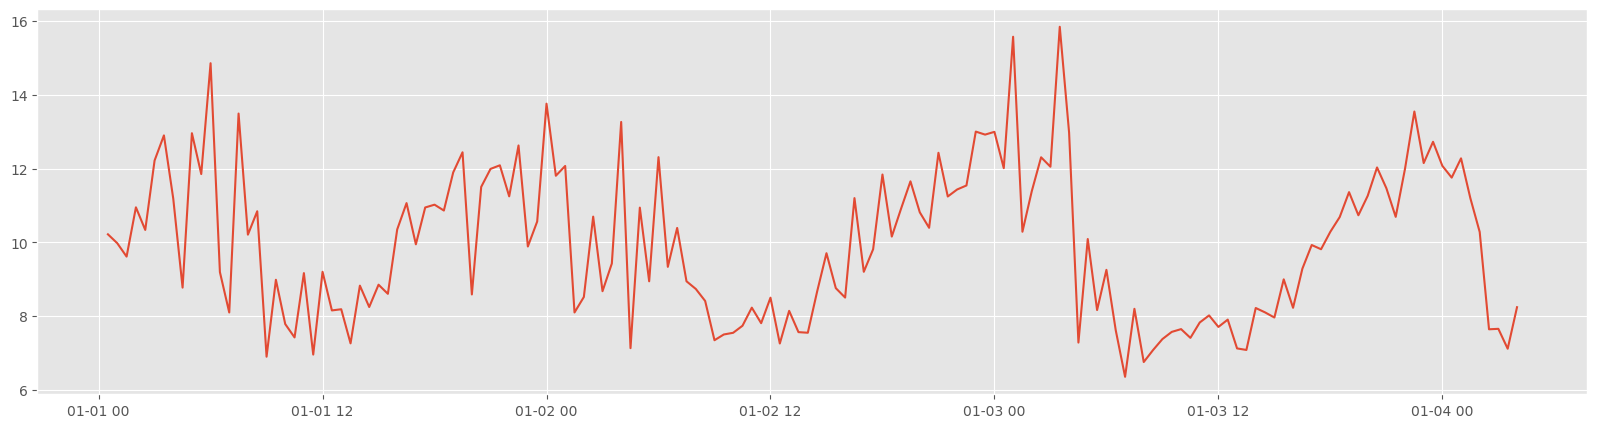

In [142]:
plt.figure(figsize=(20,5))

plt.plot(consumption_ts["avg_consumption"][:152])